---

# **Bloque I: Introducción al tratamiento de imágenes con OpenCV**

- Aprenderemos a usar Google Colab como entorno de estudio y programación

- Aprenderemos a importar distintas librerias para el tratamiento de imágenes digitales

- Aprenderemos a trabajar con las funcionalidades básicas para abrir, acceder, mostrar y guardar imágenes digitales


---

**Formato de una Imagen Digital**

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$

Una imagen se corresponde con una matriz de Filas x Columnas x Profundidad x Rango, siendo:

- Filas x Columnas = Alto x Ancho de la imagen (tamaño)
- Profundidad = número de planos de la imagen:
  - 1 para imágenes en niveles de gris
  - 3 para imágenes en color (RGB, HSV...)
  - n para imágenes multiesprectales (n = número de bandas de la imagen)
- Rango = definición de los valores de cada plano:
  - 2 para imágenes binarias
  - 256 para la definición estandar
  - mayor de 256 para alta definición

---

**Función** ***imread***

Sintaxis: cv2.imread(path, flag)

Parámetros de entrada:
- path: cadena que representa la ruta de la imagen a leer
- flag: valor entero que indica el tipo de imagen que se va a leer (valor por defecto: cv2.IMREAD_COLOR)

Valor de retorno:
- devuelve una imagen que se carga desde el archivo especificado

*Flags permitidos*:

- cv2.IMREAD_COLOR: imagen en color sin canal alfa (transparencia). Es el valor por defecto. Valor entero 1
- cv2.IMREAD_GRAYSCALE: imagen en modo escala de gris. Valor entero 0
- cv2.IMREAD_UNCHANGED: imagen tal y como se encuentre almacenada (incluyendo canal alfa). Valor entero -1

---

##**Ejemplo I.1**: abrir y mostrar imágenes

- Importamos los módulos de los paquetes que vamos a utilizar:

  *   cv2 es el paquete OpenCV con toda su funcionalidad (todos sus módulos)
  *   pyplot es un módulo de Matplotlib que tiene varias funciones para añadir elementos, como líneas, imágenes o textos, a los diferentes ejes de un gráfico
  *   drive es un objeto de google.colab que hace referencia al espacio de almacenamiento de usuario en el Drive de Google

- Montamos nuestro disco de ejecución en /content/drive. También podríamos:

>> `import google.colab.drive as disco`


- Establecemos la ruta (ubicación) de nuestra imagen de entrada en el disco

- Abrimos la imagen con la función cv2.imread (el orden de los planos de color es BGR)

- Convertimos la imagen a formato RGB que es el que emplea matplotlib

- Creamos un plot para insertar las dos imágenes y lo mostramos con `plt.show()`

>> para insertar cada imagen creamos un subplot donde el primer dígito indica el ***número de filas*** del plot, el segundo el ***número de columnas*** del plot y el tercero el ***orden*** de las imágenes en el plot

---

Mounted at /content/drive


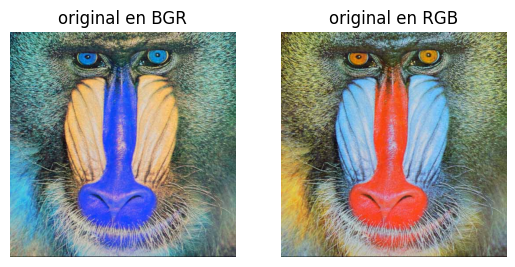

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Montamos nuestro disco de Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'baboon.jpg'
path += nombre_imagen

# Leemos la imagen en el formato empleado por OpenCV (BGR)
imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)

# Convertimos la imagen BGR a RGB que es el formato que emplea matplotlib
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

# Asignamos la imagen en BGR en la primera posición del plot
plt.subplot(121), plt.title("original en BGR"), plt.axis("off")
plt.imshow(imgBGR)

# Asignamos la imagen en RGB en la segunda posición del plot
plt.subplot(122), plt.title("original en RGB"), plt.axis("off")
plt.imshow(imgRGB)

# Mostramos el plot con las dos imágenes
plt.show()


---

- En el ejemplo anterior hemos utilizado Matplotlib para mostrar las imágenes.

- OpenCV también tiene una función para mostrar imágenes (cv2.imshow) pero no funciona en Colab; sin embargo podemos importar una función similar (cv2_imshow) que sí funciona en Colab.

---

Imagen en formato BGR mostrada con la función cv2_imshow:


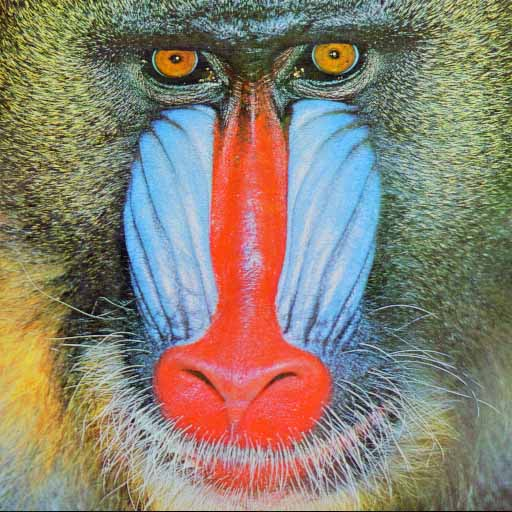

Imagen en formato RGB mostrada con la función cv2_imshow:


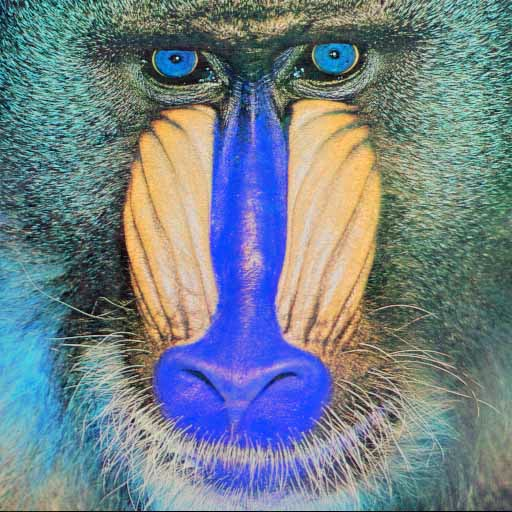

In [ ]:
from google.colab.patches import cv2_imshow

print("Imagen en formato BGR mostrada con la función cv2_imshow:")
cv2_imshow(imgBGR)

print("Imagen en formato RGB mostrada con la función cv2_imshow:")
cv2_imshow(imgRGB)


---

##**Ejemplo I.2**: convertir imágenes

- Convertimos las imágenes (BGR y RGB) a niveles de gris (monocromáticas) y las mostramos en un plot, junto con la diferencia entre ellas, para comprobar que son iguales (la conversión a gris es simplemente la media de las intensidades de los 3 planos de color --> da igual el orden de los planos)

- Convertimos una imagen en niveles de gris a una imagen en color y comprobamos que se visualiza igual que en niveles de gris (ya que no tenemos información de color) aunque una vez convertida a color sí tendrá 3 planos de color en lugar de uno

**Nota**: en el cuaderno de ejercicios dedicado al tratamiento del color estudiaremos en mayor profundidad el uso de la función cv2.cvtColor

---


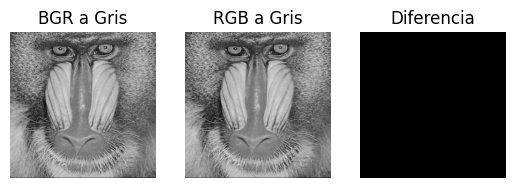

Las dimensiones de la imagen antes de convertir son: (252, 418)
Las dimensiones de la imagen después de convertir son: (252, 418, 3)


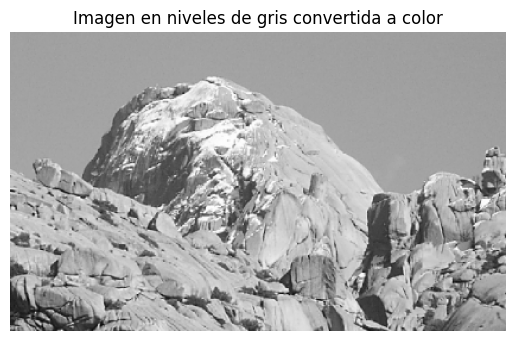

In [ ]:
# Conversión de Color a niveles de gris
# convertimos las imágenes en color a niveles de gris
imgGris1 = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
imgGris2 = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

# restamos la imagen BGR en niveles de gris de # la imagen RGB
# en niveles de gris para comprobar que son idénticas
diff = cv2.subtract(imgGris1, imgGris2)

# mostramos las 3 imágenes en un plot
plt.subplot(131), plt.title("BGR a Gris"), plt.axis("off")
plt.imshow(imgGris1, cmap = 'gray')

plt.subplot(132), plt.title("RGB a Gris"), plt.axis("off")
plt.imshow(imgGris2, cmap = 'gray')

plt.subplot(133), plt.title("Diferencia"), plt.axis("off")
plt.imshow(diff, cmap = 'gray')

plt.show()

print('============================================================')
#################################################################

# Conversión de niveles de gris a color
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'yelmo.png'
path += nombre_imagen

# Leemos una imagen en niveles de gris (monocromática)
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(f'Las dimensiones de la imagen antes de convertir son: {imgGris.shape}')

# convertimos la imagen en niveles de gris a color
imgColor = cv2.cvtColor(imgGris, cv2.COLOR_GRAY2RGB)
print(f'Las dimensiones de la imagen después de convertir son: {imgColor.shape}')

# Mostramos la imagen en un plot
plt.subplot(111)
plt.title("Imagen en niveles de gris convertida a color")
plt.axis("off")
plt.imshow(imgColor)
plt.show()


---

##**Ejemplo I.3**: trabajar con matplotlib y planos de color

- Creamos un plot de 2 filas por 3 columnas y mostramos también los 3 planos de color de la imagen

---

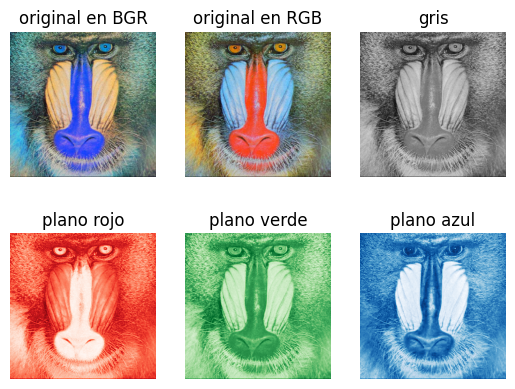

In [ ]:
plt.subplot(231), plt.title("original en BGR"), plt.axis("off")
plt.imshow(imgBGR)

plt.subplot(232), plt.title("original en RGB"), plt.axis("off")
plt.imshow(imgRGB)

plt.subplot(233), plt.title("gris"), plt.axis("off")
plt.imshow(imgGris1, cmap = "gray")

plt.subplot(234), plt.title("plano rojo"), plt.axis("off")
plt.imshow(imgRGB[:, :, 0], cmap = "Reds_r")

plt.subplot(235), plt.title("plano verde"), plt.axis("off")
plt.imshow(imgRGB[:, :, 1], cmap = "Greens_r")

plt.subplot(236), plt.title("plano azul"), plt.axis("off")
plt.imshow(imgRGB[:, :, 2], cmap = "Blues_r")

plt.show()


---

##**Ejemplo I.4**: formato de imágenes

- Abrimos una imagen en niveles de gris y mostramos las propiedades de la imagen: comprobamos que tiene un único canal y los datos son de tipo unigned int de 8 bits (uint8) y, por lo tanto, el número de píxeles de la imagen coincide con su tamaño en bytes

- Abrimos una imagen en color y mostramos las propiedades de la imagen: comprobamos que tiene 3 canales y los datos son de tipo unigned int de 8 bits (uint8) y, por lo tanto, el tamaño de la imagen en bytes es el triple que su número de píxeles

---


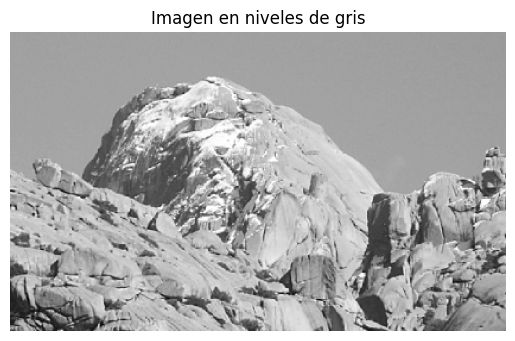

Las dimensiones de la imagen son: (252, 418)
Alto x Ancho = 252 x 418 = 105336 píxeles
El tipo de datos de la imagen es: uint8
El tamaño la imagen es: 105336 bytes


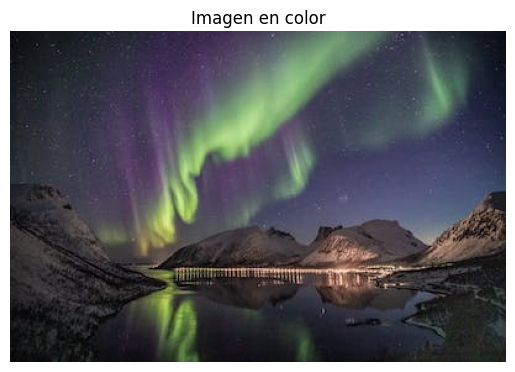

Las dimensiones de la imagen son: (268, 402, 3)
Alto x Ancho = 268 x 402 = 107736 píxeles
El tipo de datos de la imagen es: uint8
El tamaño la imagen es: 323208 bytes


In [ ]:
# IMAGEN EN NIVELES DE GRIS
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'yelmo.png'
path += nombre_imagen

# Leemos una imagen en niveles de gris (monocromática)
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Mostramos la imagen en un plot
plt.subplot(111), plt.title("Imagen en niveles de gris"), plt.axis("off")
plt.imshow(imgGris, cmap = "gray")
plt.show()

# Mostramos los atributos principales de la imagen
print(f'Las dimensiones de la imagen son: {imgGris.shape}')
alto = imgGris.shape[0]
ancho = imgGris.shape[1]
print(f'Alto x Ancho = {alto} x {ancho} = {alto * ancho} píxeles')
print(f'El tipo de datos de la imagen es: {imgGris.dtype}')
print(f'El tamaño la imagen es: {imgGris.size} bytes')

########################################################################

# IMAGEN EN COLOR
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'aurora.jpeg'
path += nombre_imagen

# Leemos la imagen en BGR y la convertimos a RGB
imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

# Mostramos la imagen en un plot
plt.subplot(111), plt.title("Imagen en color"), plt.axis("off")
plt.imshow(imgRGB)
plt.show()

# Mostramos los atributos principales de la imagen
print(f'Las dimensiones de la imagen son: {imgRGB.shape}')
alto = imgRGB.shape[0]
ancho = imgRGB.shape[1]
print(f'Alto x Ancho = {alto} x {ancho} = {alto * ancho} píxeles')
print(f'El tipo de datos de la imagen es: {imgRGB.dtype}')
print(f'El tamaño la imagen es: {imgRGB.size} bytes')


---

##**Ejemplo I.5**: Regiones de Interés (ROI)

En OpenCV el origen de coordenadas se encuentra en la esquina superior izquierda de la imagen, la coordenada **x** hace referencia al número de fila y la coordenada **y** hace referencia al número de columna

En OpenCV las imágenes son vectores de 3 dimensiones x, y, z (las ROI también lo son) en los que la x se corresponde con las filas, la y con las columnas y la z con el valor del pixel en esa posición espacial en 2D (un uint8 para las imágenes monocromáticas y un vector de 3 uint8 para las imágenes en color)

Por lo tanto para seleccionar una zona de una imagen debemos proporcionar las coordenadas espaciales x e y de un punto p1 y el alto y ancho (con los que ya podemos calcular las coordenadas espaciales del punto p2)

Así mismo, si utilizamos la notación "**:**" para indicar los rangos de x e y seleccionados debemos indicar que: en **X** seleccionamos desde p1.x hasta p2.x (siendo p2.x = p1.x + alto) y en **Y** seleccionamos desde p1.y hasta p2.y (siendo p2.y = p1.y + ancho)

> : --> todos

> X: --> desde X

> :Y --> hasta Y

> X:Y --> desde X hasta Y

> V --> los de la posición V

- En este ejemplo vamos a dibujar dos rectángulos dentro de una imagen y después vamos a obtener las ROI de ambos rectángulos para mostrarlas en un plot

**Importante**:

- Cuando hacemos referencia al alto y ancho de una imagen tenemos que considerar que x hace referencia al número de filas de la imagen (coordenada vertical) e y hace referencia al número de columnas de la imagen (coordenada horizontal). Por lo tanto, estamos hablando de una matriz bidimensional de **filas x columnas**

- Sin embargo, cuando hacemos referencia a una forma geométrica dentro de la imagen tenemos que considerar que x hace referencia al ancho de la forma geométrica (coordenada horizontal) e y hace referencia al alto de la forma geométrica (coordenada horizontal). Por lo tanto, estamos hablando de una matriz bidimensional de **columnas x filas**

---


Alto x Ancho = 536 x 402


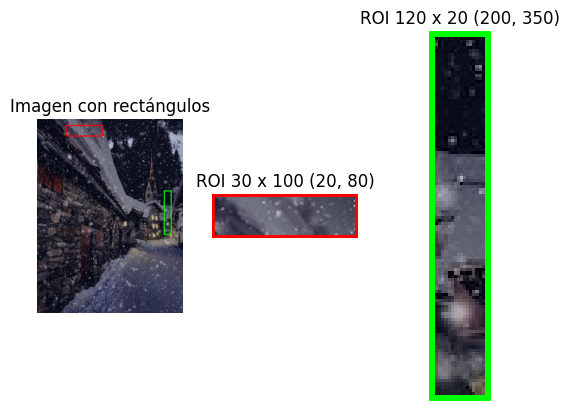

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'nevando.jpg'
path += nombre_imagen

# Leemos la imagen en BGR y la convertimos a RGB
imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

# Obtenemos el alto y el ancho de la imagen
alto = imgRGB.shape[0]
ancho = imgRGB.shape[1]
print(f'Alto x Ancho = {alto} x {ancho}')

# Primer rectángulo: dibujamos un rectángulo de color rojo en el punto
# con una anchura de 100 pixeles y una altura de 30 píxeles
# Recordar: al dibujar formas geométricas la coordenada x hace referencia
# a las columnas y la coordenada y a las filas (columnas x filas).
# Si lo queremos situar en la posición fila 20 y columna 80, el origen de
# coordenadas del rectángulo será el punto (80,20)
x1 = 80 # columna
y1 = 20 # fila
anchoRect = 100
altoRect = 30
x2 = x1 + anchoRect - 1
y2 = y1 + altoRect - 1
cv2.rectangle(imgRGB,(x1,y1),(x2, y2),(255,0,0), 2)

# ROI equivalente de 30 filas x 100 columnas recortando desde la posición
# que se encuentra en: (fila 20, columna 80)
x1 = 20 # fila
y1 = 80 # columna
altoROI = 30
anchoROI = 100
x2 = x1 + altoROI
y2 = y1 + anchoROI
roi1 = imgRGB[x1:x2, y1:y2]

# Segundo rectángulo: dibujamos un rectángulo de color verde en el punto
# con una anchura de 20 pixeles y una altura de 120 píxeles
# Recordar: al dibujar formas geométricas la coordenada x hace referencia
# a las columnas y la y a las filas (columnas x filas).
# Si lo queremos situar en la posición fila 200 y columna 350, el origen de
# coordenadas del rectángulo será el punto (350,200)
x1 = 350 # columna
y1 = 200 # fila
anchoRect = 20
altoRect = 120
x2 = x1 + anchoRect - 1
y2 = y1 + altoRect - 1
cv2.rectangle(imgRGB,(x1,y1),(x2, y2),(0,255,0), 2)

# ROI equivalente de 120 filas x 20 columnas recortando desde la posición
# que se encuentra en: (fila 200, columna 350)
x1 = 200 # fila
y1 = 350 # columna
altoROI = 120
anchoROI = 20
x2 = x1 + altoROI
y2 = y1 + anchoROI
roi2 = imgRGB[x1:x2, y1:y2]

plt.subplot(131), plt.title("Imagen con rectángulos"), plt.axis("off")
plt.imshow(imgRGB)

plt.subplot(132), plt.title("ROI 30 x 100 (20, 80)"), plt.axis("off")
plt.imshow(roi1)

plt.subplot(133), plt.title("ROI 120 x 20 (200, 350)"), plt.axis("off")
plt.imshow(roi2)

plt.show()


---

##**Ejemplo I.6**: acceso a los valores de una imagen

- Mostramos metadatos de la imagen original

- Mostramos el valor de un pixel y su valor después de modificarlo

- Obtenemos los 3 planos de color en imágenes independientes r , g , b

- Probamos distintos métodos de acceder al valor de un pixel

- Obtenemos una ROI (Region Of Interest), la copiamos a otra zona de imagen y mostramos la imagen resultante en un plot de 1 x 1

---

(Alto, Ancho, Planos):  (512, 512, 3)
Número de píxeles:  786432
Tipo de datos:  uint8
Valor del pixel en la posición [20, 100]:  [143 160 105]
Valor del pixel en la posición [20, 100]:  [0 0 0]
Valor del pixel RGB en la posición [100, 100]:  [121 133 111]
Valor del pixel rojo en la posición [100, 100]:  121
Valor del pixel verde en la posición [100, 100]:  133
Valor del pixel azul en la posición [100, 100]:  111
(Alto, Ancho, Planos) de la ROI:  (40, 80, 3)


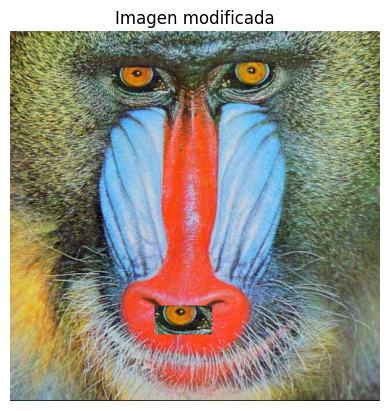

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'baboon.jpg'
path += nombre_imagen

# Leemos la imagen en el formato empleado por OpenCV (BGR)
imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)

# Convertimos la imagen BGR a RGB que es el formato que emplea matplotlib
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

# Mostramos los metadatos de la imagen
print("(Alto, Ancho, Planos): ", imgRGB.shape)
print("Número de píxeles: ", imgRGB.size)
print("Tipo de datos: ", imgRGB.dtype)

pixel = imgRGB[20, 100] # valor de la fila 20, columna 100
print("Valor del pixel en la posición [20, 100]: ", pixel)
imgRGB[20, 100] = [0, 0, 0] # vector con los 3 valores de color RGB
print("Valor del pixel en la posición [20, 100]: ", imgRGB[20, 100])

# la función split nos devuelve los 3 planos de color por separado
# y la función merge nos permite volver a componer la imagen RGB
r, g, b = cv2.split(imgRGB) # imgRGB = cv2.merge((r, g, b))

# otra forma de obtener los distintos planos sería:
# r = imgRGB[:, :, 0] g = imgRGB[:, :, 1] b = imgRGB[:, :, 2]

pixel = imgRGB[100, 100]
print("Valor del pixel RGB en la posición [100, 100]: ", pixel)
pixelR = imgRGB.item(100, 100, 0)
print("Valor del pixel rojo en la posición [100, 100]: ", pixelR)
pixelG = g[100, 100]
print("Valor del pixel verde en la posición [100, 100]: ", pixelG)
pixelB = b[100, 100]
print("Valor del pixel azul en la posición [100, 100]: ", pixelB)

# recortamos una ROI de la zona en la que se encuentra el ojo izquierdo
# desde fila 50 hasta fila 90 (40 de alto) y
# desde columna 140 hasta columna 220 (80 de ancho)
roi = imgRGB[50:90, 140:220]

# copiamos la roi a otra zona de la imagen (en la nariz)
# evidentemente tiene que ser del mismo tamaño
imgRGB[380:420, 200:280] = roi
print("(Alto, Ancho, Planos) de la ROI: ", roi.shape)

plt.subplot(111), plt.title("Imagen modificada"), plt.axis("off")
plt.imshow(imgRGB)

plt.show()


---

##**Ejemplo I.7**: salvar una imagen

- Leemos la imagen lena.bmp (comprobando primero que se encuentra en nuestro directorio de trabajo)
- La convertimos a RGB
- La salvamos en formato JPEG con el nombre lena.jpg
- Comprobamos que se ha salvado correctamente y vemos si se ha almacenado en el directorio de trabajo
- La volvemos a salvar en formato JPEG pero con una compresión del 90% (lo que es lo mismo que con un 10% de calidad) con el nombre lena_cp.jpg
- Volvemos a comprobar que se ha salvado correctamente y volvemos a ver si se ha almacenado en el directorio de trabajo
- Abrimos las dos imágenes JPEG almacenadas y las mostramos en un plot
- Probar con otros valores de compresión y comprobar los tamaños de los ficheros almacenados

---

**Función** ***imwrite***

Sintaxis: cv2.imwrite(filename, image)

Parámetros de entrada:
- filename: una cadena con el nombre del fichero incluyendo el formato mediante su extensión (.bmp, .jpg, .png, etc.)
- image: el nombre de la variable en la que almacenamos la imagen que queremos salvar

Valor de retorno:
- true si se ha podido salvar correctamente

*formatos soportados*:

Los formatos soportados dependen de los codecs incluidos en nuestra libreria OpenCV instalada. Los habitualmente soportados son los siguientes:

- JPEG (.jpg, .jpeg)
- PNG (.png)
- TIFF (.tiff, .tif)
- BMP (.bmp)
- PPM (.ppm)
- PGM (.pgm)

---


Listado del directorio antes de salvar imágenes:
['baboon.jpg', 'aurora.jpeg', 'lena.jpg', 'lluvia.mov', 'nevando.jpg', 'DrivImages.zip', 'teide.jpg', 'yelmo.png', 'atardecer.jpeg', 'bailarina.mp4', 'teide_modificado.bmp']
Listado del directorio después de salvar lena.jpg:
['baboon.jpg', 'aurora.jpeg', 'lena.jpg', 'lluvia.mov', 'nevando.jpg', 'DrivImages.zip', 'teide.jpg', 'yelmo.png', 'atardecer.jpeg', 'bailarina.mp4', 'teide_modificado.bmp', 'lena.bmp']
Listado del directorio después de salvar lena_cp.jpg:
['baboon.jpg', 'aurora.jpeg', 'lena.jpg', 'lluvia.mov', 'nevando.jpg', 'DrivImages.zip', 'teide.jpg', 'yelmo.png', 'atardecer.jpeg', 'bailarina.mp4', 'teide_modificado.bmp', 'lena.bmp', 'lena_cp.jpg']


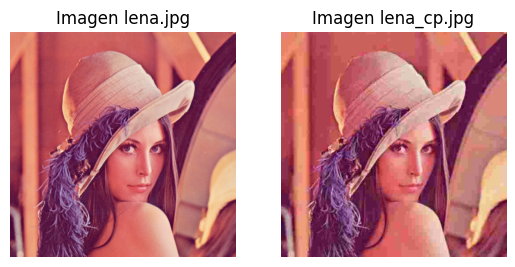

In [ ]:
import os

# Directorio de trabajo
dir = "/content/drive/MyDrive/fuck/"

# Cambiamos a nuestro directorio de trabajo
os.chdir(dir)

# Mostramos los ficheros y directorios existentes en nuesto directorio de trabajo
print("Listado del directorio antes de salvar imágenes:")
print(os.listdir(dir))

# Leemos la imagen lena.bmp
nombre_imagen = 'lena.jpg'
path = dir + nombre_imagen

# Leemos la imagen en el formato empleado por OpenCV (BGR)
img = cv2.imread(path, cv2.IMREAD_COLOR)

# Salvamos la imagen en formato JPEG
ok = cv2.imwrite('lena.bmp', img)
if not ok:
    print("Error salvando la imagen")

# Mostramos los ficheros y directorios existentes en nuesto directorio de trabajo
print("Listado del directorio después de salvar lena.jpg:")
print(os.listdir(dir))

# Salvamos la imagen en formato JPEG con 90% de compresión (calidad = 10%)
ok = cv2.imwrite('lena_cp.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 10])
if not ok:
    print("Error salvando la imagen")

# Mostramos los ficheros y directorios existentes en nuesto directorio de trabajo
print("Listado del directorio después de salvar lena_cp.jpg:")
print(os.listdir(dir))

# Leemos la imagen lena.jpg
nombre_imagen = 'lena.jpg'
path = dir + nombre_imagen
imgLenaBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgLenaRGB = cv2.cvtColor(imgLenaBGR, cv2.COLOR_BGR2RGB)

# Leemos la imagen lena_cp.jpg
nombre_imagen = 'lena_cp.jpg'
path = dir + nombre_imagen
imgLenaCPBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgLenaCPRGB = cv2.cvtColor(imgLenaCPBGR, cv2.COLOR_BGR2RGB)

# Mostramos las dos imágenes en un plot
plt.subplot(121), plt.title("Imagen lena.jpg"), plt.axis("off")
plt.imshow(imgLenaRGB)
plt.subplot(122), plt.title("Imagen lena_cp.jpg"), plt.axis("off")
plt.imshow(imgLenaCPRGB)
plt.show()


---

# **EJERCICIO 1**: Regiones de Interes (ROI)

**Enunciado**:

Leer la imagen "teide.jpg" e insertar un rectángulo negro de *120 columnas x 90 filas* en el centro de la imagen original. Después añadir un rectángulo blanco que ocupe 30 filas (de la 50 a la 80) de la imagen. Mostrar la imagen resultado y salvarla en un fichero con en formato BMP

---


In [10]:
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'teide.jpg'
path += nombre_imagen

img = cv2.imread(path, cv2.IMREAD_COLOR)
imgGUD = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

alto = img.shape[0]
ancho = img.shape[1]

centro_x = ancho // 2
centro_y = alto // 2

x1_negro = centro_x - 60
y1_negro = centro_y - 45
x2_negro = centro_x + 60
y2_negro = centro_y + 45

imgGUD[y1_negro:y2_negro, x1_negro:x2_negro] = [0, 0, 0]

x1_blanco = 0
y1_blanco = 50
x2_blanco = ancho
y2_blanco = 80
imgGUD[y1_blanco:y2_blanco, x1_blanco:x2_blanco] = [255, 255, 255]


# Mostramos la imagen resultado
plt.subplot(111), plt.title("Imagen modificada"), plt.axis("off")
plt.imshow(imgGUD)
plt.show()

patata = 'teide_modificado.bmp'
salsa = "/content/drive/MyDrive/fuck/"
salsa += patata
imgTeideBGR = cv2.imread(salsa, cv2.IMREAD_COLOR)
imgTeideRGB = cv2.cvtColor(imgTeideBGR, cv2.COLOR_BGR2RGB)


plt.subplot(111), plt.title("Imagen teide_modificado.jpg"), plt.axis("off")
plt.imshow(imgTeideRGB)
plt.show()




error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


---

# **Bloque II: Introducción al tratamiento de vídeos con OpenCV**

En el tratamiento de vídeo nos centramos en cómo podemos abrir un archivo de vídeo, acceder a sus fotogramas (frames), aplicar filtros u operaciones en los mismos y salvar vídeos en archivos.

**Importante**: En este bloque del cuaderno de ejercicios vamos a tratar con secuencias de imágenes (vídeos) y por ello lo vamos a hacer fuera de Colab. Por lo tanto, para todos los ejemplos propuestos debemos copiar el código en un fichero .py y ejecutar con python o en algún entorno de desarrollo como PyCharm

---

Las **imágenes y vídeos** a utilizar en este bloque del cuaderno de ejercicios son:

- lluvia.mov
- atardecer.jpeg
- bailarina.mp4
- papagayos.mp4
- DrivImages.zip

---

## **Ejemplo II.1**: abrir y mostrar un fichero de vídeo

Para abrir un archivo de vídeo en OpenCV se emplea la función **VideoCapture** que tiene un único parámetro de entrada que puede ser un número para indicar la cámara de la que se captará el vídeo (0 --> la cámara principal, 1 --> segunda cámara disponible...) o el nombre de un archivo que almacena un vídeo.

---


In [9]:
import cv2
from google.colab.patches import cv2_imshow


cap = cv2.VideoCapture('lluvia.mov')

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print('No se reciben más tramas. Saliendo...')
    break
  cv2_imshow(frame)
  if cv2.waitKey(1) == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()


---

## **Ejemplo II.2**: abrir la cámara del equipo y mostrar el vídeo resultante

**Nota**: La función flip de OpenCV permite dar la vuelta a una imagen sobre sus ejes (horizontal o vertical). Para ello se emplea un segundo parámetro (0 --> en horizontal, un número positivo --> en vertical y un número negativo --> en los dos ejes)

---


In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print('No se reciben más tramas. Saliendo...')
    break
  cv2.imshow('frame', cv2.flip(frame, 1))
  if cv2.waitKey(1) == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()


---

## **Ejemplo II.3**: crear y mostrar un vídeo con ruido aleatorio

---


In [ ]:
from time import time
import cv2
from numpy import uint8
from numpy.random import rand

# Número total de frames del vídeo a generar
nf = 100

# Dimensiones xy de cada frame del vídeo
xy = (512, 512)

def mostrar_video(frames):
  tic = time()
  for i in frames:
      cv2.imshow('test', i)
      cv2.waitKey(100) # milisegundos
  cv2.destroyAllWindows()
  return nf / (time() - tic)

imgs = (rand(nf, xy[0], xy[1]) * 255).astype(uint8)
fps = mostrar_video(imgs)
print(f'{fps} frames por segundo')


---

## **Ejemplo II.4**: crear y salvar un vídeo con un efecto Ken Burns

En este ejemplo vamos a crear un vídeo con un efecto conocido como efecto Ken Burns (una técnica de panorámica y zoom que lleva el nombre del cineasta Ken Burns):

    Instead of showing a large static photo on screen, the Ken Burns effect crops to a detail, then pans across the image.
    — Wikipedia, “Efecto Ken Burns”

Para salvar un archivo de vídeo en OpenCV se emplea la función **VideoWriter** que tiene los siguientes parámetros de entrada:

- *filename*: nombre (con la extensión correspondiente) que tendrá el archivo de video

- *fourcc*: un código que utiliza 4 caracteres con el que se identifica el códec empleado

- *fps*: la velocidad de fotogramas de la secuencia de video

- *frameSize*: el tamaño de los frames que componen el video

Un códec de video es un tipo de codificador que permite comprimir y descomprimir video digital. **FourCC** (Four Characters Code o Código de Cuatro Caracteres) es un código que utiliza 4 caracteres con el que se identifica cada códec. Esta información es almacenada en el archivo contenedor de video para facilitar la búsqueda del códec necesario para reproducir el archivo multimedia.

En OpenCV se emplea la función **VideoWriter_fourcc** para seleccionar el códec que queramos. Por ejemplo: mp4v (para ficheros .mp4, .mkv, .mov y .wmv) o FMP4 (para ficheros .avi o .wmv).

---


In [ ]:
import cv2
import numpy as np

file_img = 'atardecer.jpeg'
img = cv2.imread(file_img, cv2.IMREAD_COLOR)
print('Imagen Original')
cv2.imshow("Ori", img)
cv2.waitKey(0)

video_dim = (1280, 720)
fps = 30
duration = 3.0
start_center = (0.4, 0.6)
end_center = (0.5, 0.5)
start_scale = 0.7
end_scale = 1.0

orig_shape = img.shape[:2]

def crop(img, x, y, w, h):
    x0, y0 = max(0, x-w//2), max(0, y-h//2)
    x1, y1 = x0+w, y0+h
    return img[y0:y1, x0:x1]

num_frames = int(fps * duration)
frames = []
for alpha in np.linspace(0, 1, num_frames):
    rx = end_center[0]*alpha + start_center[0]*(1-alpha)
    ry = end_center[1]*alpha + start_center[1]*(1-alpha)
    x = int(orig_shape[1]*rx)
    y = int(orig_shape[0]*rx)
    scale = end_scale*alpha + start_scale*(1-alpha)
    # determined how to crop based on the aspect ratio of width/height
    if orig_shape[1]/orig_shape[0] > video_dim[0]/video_dim[1]:
        h = int(orig_shape[0]*scale)
        w = int(h * video_dim[0] / video_dim[1])
    else:
        w = int(orig_shape[1]*scale)
        h = int(w * video_dim[1] / video_dim[0])
    # crop, scale to video size, and save the frame
    cropped = crop(img, x, y, w, h)
    scaled = cv2.resize(cropped, dsize=video_dim, interpolation=cv2.INTER_LINEAR)
    frames.append(scaled)

# write to MP4 file
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
vidwriter = cv2.VideoWriter("output.mp4", fourcc, fps, video_dim)
for frame in frames:
    vidwriter.write(frame)
vidwriter.release()

---

## **Ejemplo II.5**: salvar todos los frames de un vídeo como imágenes independientes

---


In [ ]:
import cv2
import numpy as np
import os

cap = cv2.VideoCapture('bailarina.mp4')

try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error al crear el directorio para almacenar los frames')

currentFrame = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('No se reciben más tramas. Saliendo...')
        break

    name = './data/frame' + str(currentFrame) + '.jpg'
    print ('Creando...' + name)
    cv2.imwrite(name, frame)

    currentFrame += 1

cap.release()
cv2.destroyAllWindows()

---

## **Ejemplo II.6**: acceso a las propiedades de un vídeo

---


In [ ]:
import cv2

cap = cv2.VideoCapture('papagayos.mp4')

# Mostramos el valor de las propiedades del vídeo
print("CAP_PROP_FRAME_WIDTH: '{}'".format(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print("CAP_PROP_FRAME_HEIGHT: '{}'".format(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print("CAP_PROP_FPS: '{}'".format(cap.get(cv2.CAP_PROP_FPS)))
print("CAP_PROP_POS_MSEC: '{}'".format(cap.get(cv2.CAP_PROP_POS_MSEC)))
print("CAP_PROP_FRAME_COUNT : '{}'".format(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

# Mostramos el vídeo
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print('No se reciben más tramas. Saliendo...')
    break
  cv2.imshow('frame', frame)
  if cv2.waitKey(1) == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()

# Volvemos a mostrar el vídeo desde el cuarto segundo
cap = cv2.VideoCapture('papagayos.mp4')
cap.set(cv2.CAP_PROP_POS_MSEC, 4000)
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print('No se reciben más tramas. Saliendo...')
    break
  cv2.imshow('frame', frame)
  if cv2.waitKey(1) == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()


---

## **Ejemplo II.7**: crear un vídeo a partir de una base de datos de imágenes

Para este ejemplo vamos a utilizar un dataset de imágenes del grupo de investigación Elektra Autonomous Vehicle formado por el CVC (Computer Vision Center), la UAB y la UPC.

El dataset empleado está formado por secuencias de imágenes frontales de conductores y sirve para investigar métodos de reconomiento del comportamiento de los mismos al volante. Lo podemos descargar de:
http://adas.cvc.uab.es/elektra/enigma-portfolio/cvc11-drivface-dataset/

---


In [ ]:
import os
import cv2

# Ubicación de la base de datos de imágenes
path = './DrivImages/'
archivos = sorted(os.listdir(path))
img_array = []

# Leer imagenes
for x in range (0,len(archivos)):
    nomArchivo = archivos[x]
    dirArchivo = path + str(nomArchivo)
    img = cv2.imread(dirArchivo)
    img_array.append(img)

# Dimensiones de los frames alto y ancho
height, width = img.shape[:2]

# Características del vídeo
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video = cv2.VideoWriter('CVC-11.avi', fourcc, 10, (width,height))

# Insertar los frames en el vídeo
for i in range(0, len(archivos)):
    video.write(img_array[i])

# Liberar recursos
video.release()


---

# **EJERCICIO 2**: Detección de movimiento

**Enunciado**:

Abrir el vídeo "papagayos.mp4", restar dos frames consecutivos (por ejemplo, el frame 10 y el frame 11) y mostrar el resultado de la resta en un plot.

**Nota**: para restar dos imágenes utilizar la función cv2.subtract(ima1, ima2). En el cuaderno dedicado a las operaciones aritméticas y lógicas veremos en mayor profundidad esta función de resta de imágenes.

---


---

## **Ejemplo II.8**: detección de movimiento mediante sustracción de fondo

**Nota**: En OpenCV tenemos otros algoritmos de sustracción de fondo como:

    cv2.createBackgroundSubtractorMOG2()
    cv2.bgsegm.createBackgroundSubtractorGMG()
    cv2.createBackgroundSubtractorKNN()

---


In [ ]:
import cv2

cap = cv2.VideoCapture(0)
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    print('No se reciben más tramas. Saliendo...')
    break

  fgmask = fgbg.apply(frame)
  cv2.imshow('fgmask', cv2.flip(fgmask, 1))

  if cv2.waitKey(1) == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()
